# MEDICUS

In [7]:
import pandas as pd

dataset = pd.read_csv("data/dataset.csv")
print("Rows, Cols: %s" % (dataset.shape, ))

Rows, Cols: (500, 11)


In [8]:
dataset.head()

,StateAbbr,PlaceName,BPHIGH_CrudePrev,CANCER_CrudePrev,CHD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev
0,AL,Birmingham,43.8,5.7,7.7,24.4,16.8,39.2,41.9,46.5,26.1
1,AL,Hoover,30.7,6.6,5.0,14.1,8.1,35.9,28.6,34.6,9.6
2,AL,Huntsville,36.8,6.6,6.5,19.1,11.5,38.9,33.8,39.2,14.9
3,AL,Mobile,42.0,6.5,7.7,22.8,13.8,39.9,34.7,41.6,24.3
4,AL,Montgomery,40.3,6.0,6.7,22.0,13.1,37.4,38.9,41.1,21.2


Populating the interactive namespace from numpy and matplotlib


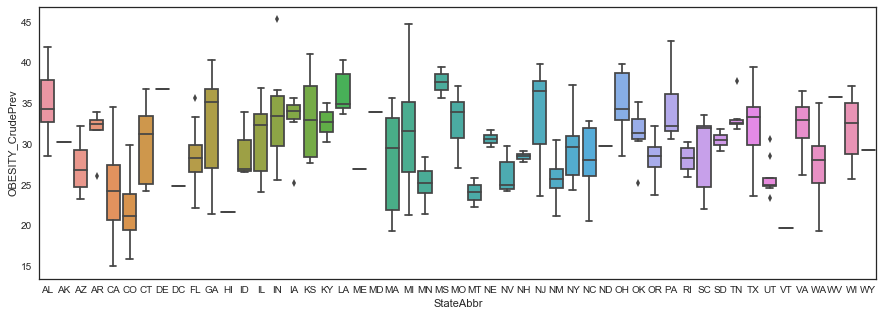

In [16]:
%pylab inline

import seaborn as sns

sns.set(style="white", color_codes=True)

pylab.rcParams["figure.figsize"] = (15, 5)
sns.boxplot(x="StateAbbr", y="OBESITY_CrudePrev", data=dataset)

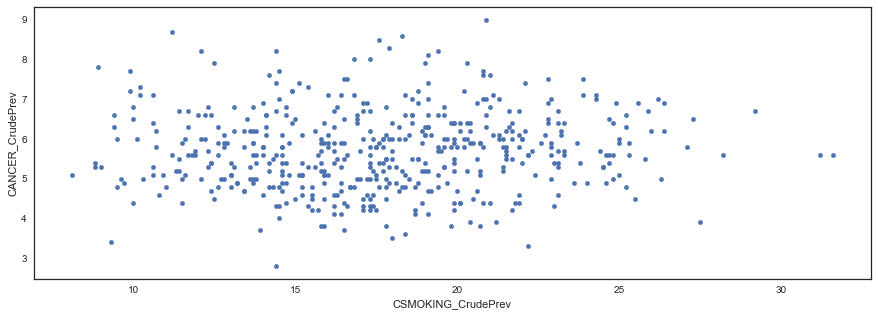

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

pylab.rcParams["figure.figsize"] = (15, 5)
dataset.plot(kind="scatter", x="CSMOKING_CrudePrev", y="CANCER_CrudePrev")
plt.show()

In [18]:
cols = dataset[["BPHIGH_CrudePrev", "CANCER_CrudePrev", "CHD_CrudePrev", "CSMOKING_CrudePrev", "DIABETES_CrudePrev", "HIGHCHOL_CrudePrev", "OBESITY_CrudePrev", "SLEEP_CrudePrev", "TEETHLOST_CrudePrev"]]
corr = cols.corr()
corr

,BPHIGH_CrudePrev,CANCER_CrudePrev,CHD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev
BPHIGH_CrudePrev,1.000000,0.347332,0.854970,0.698888,0.842355,0.753290,0.744034,0.658592,0.708818
CANCER_CrudePrev,0.347332,1.000000,0.515550,0.058153,0.022720,0.524840,-0.058249,-0.197655,-0.100066
CHD_CrudePrev,0.854970,0.515550,1.000000,0.692472,0.789909,0.829365,0.646578,0.474984,0.678524
CSMOKING_CrudePrev,0.698888,0.058153,0.692472,1.000000,0.600786,0.476549,0.788771,0.583488,0.878214
DIABETES_CrudePrev,0.842355,0.022720,0.789909,0.600786,1.000000,0.673553,0.728049,0.737651,0.726301
HIGHCHOL_CrudePrev,0.753290,0.524840,0.829365,0.476549,0.673553,1.000000,0.591259,0.347989,0.458077
OBESITY_CrudePrev,0.744034,-0.058249,0.646578,0.788771,0.728049,0.591259,1.000000,0.577715,0.806334
SLEEP_CrudePrev,0.658592,-0.197655,0.474984,0.583488,0.737651,0.347989,0.577715,1.000000,0.679876
TEETHLOST_CrudePrev,0.708818,-0.100066,0.678524,0.878214,0.726301,0.458077,0.806334,0.679876,1.000000


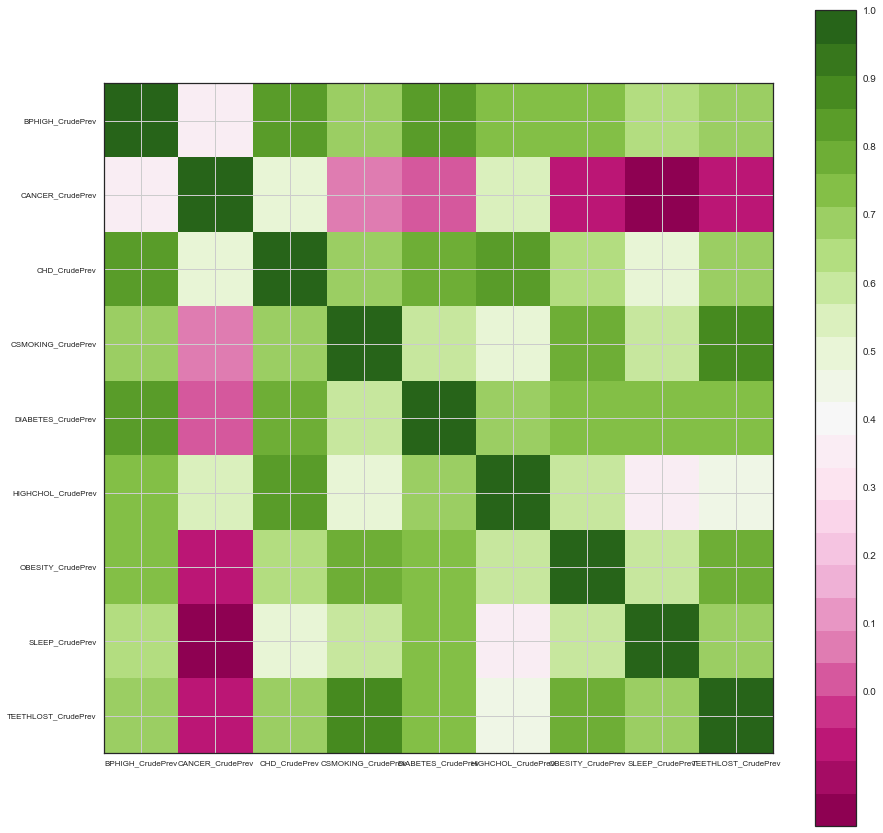

In [29]:
from matplotlib import cm

pylab.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr, interpolation="nearest", cmap=cm.get_cmap("PiYG", 25))
cols = ["", "BPHIGH_CrudePrev", "CANCER_CrudePrev", "CHD_CrudePrev", "CSMOKING_CrudePrev", "DIABETES_CrudePrev", "HIGHCHOL_CrudePrev", "OBESITY_CrudePrev", "SLEEP_CrudePrev", "TEETHLOST_CrudePrev"]
ax1.grid(True)
ax1.set_xticklabels(cols, fontsize=8)
ax1.set_yticklabels(cols, fontsize=8)
fig.colorbar(cax, ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.show()